**Data cleaning**

In [41]:
import numpy as np
import scipy
import pandas as pd
import os
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

In [36]:
df = pd.read_csv('FRED_federal_deficit.csv')
df = df.rename(columns = {"DATE": "Month", "MTSDS133FMS": "Deficit_mil"})
df['Month'] = pd.to_datetime(df['Month'])
df.sort_values(by = 'Month')
df.info()
filtered_df = df.loc[(df['Month']<'2020-03-01') | (df['Month']>'2020-06-01')]
filtered_df.info()

# plt.plot(filtered_df["Month"], filtered_df["Deficit_mil"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        516 non-null    datetime64[ns]
 1   Deficit_mil  516 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.2 KB
<class 'pandas.core.frame.DataFrame'>
Index: 512 entries, 0 to 515
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        512 non-null    datetime64[ns]
 1   Deficit_mil  512 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [37]:
#save monthly deficit data excluding COVID months(2020-03-01 to 2020-06-01)
filtered_df.to_csv('filtered_deficit.csv')

**Deficit Change Data**

In [45]:
df = filtered_df
deficit_diff = df.diff(axis = 0)
deficit_diff["Month"] = df["Month"]
deficit_diff.drop([0], axis = 0, inplace = True)
deficit_diff.rename(columns = {"Deficit_mil": "Del_deficit_mil"}, inplace = True)
deficit_diff.to_csv('filtered_delta_deficit.csv')

# plt.plot(deficit_diff["Month"], deficit_diff["Deficit_mil"])

**Plot Seaonality**

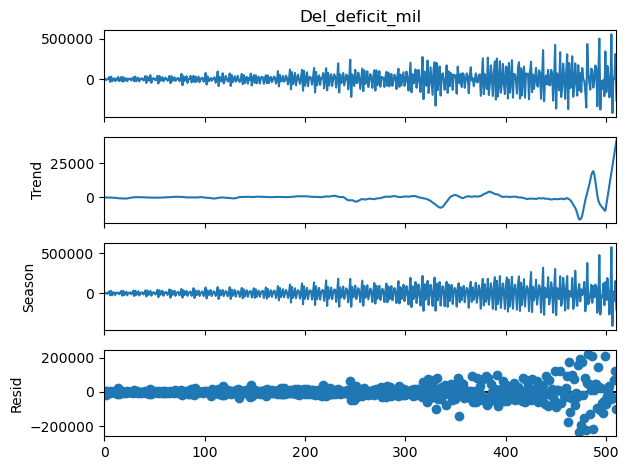

In [54]:
df = pd.read_csv('filtered_delta_deficit.csv')
df = df[["Month", "Del_deficit_mil"]]
df['Month'] = pd.to_datetime(df['Month'])
# df = df.loc[(df['Month']>'2015-10-01')]
# df
seasonal = STL(df['Del_deficit_mil'], period=12)
res = seasonal.fit()
fig = res.plot()